##### Participant - Sanjay Ram R R

# Setting up License key

In [1]:
# Setting the QuantRocket license with the provided license key

from quantrocket.license import set_license
set_license("YOUR-LICENSE-KEY")

{'licensekey': '725c........6afe', 'software_license': {}}

# Setting up the Universe

In [ ]:
# Creating a US stock database named "usstock-free-1d"
# with a bar size of "1 day" and setting it as a free database (free=True)

from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", bar_size="1 day", free=True)

In [4]:
# Collecting historical data for the database named "usstock-free-1d"

from quantrocket.history import collect_history
collect_history("usstock-free-1d")

{'status': 'the historical data will be collected asynchronously'}

In [16]:
from quantrocket.master import get_securities
securities = get_securities(vendors="usstock", sec_types="STK")
securities

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT
FIBBG000BFWKC0,MON,XNYS,US,USD,STK,False,America/New_York,MONSANTO CO,1,1,True,2018-06-06,NaT,NaT
FIBBG000BKZB36,HD,XNYS,US,USD,STK,False,America/New_York,HOME DEPOT INC,1,1,False,NaT,NaT,NaT
FIBBG000BMHYD1,JNJ,XNYS,US,USD,STK,False,America/New_York,JOHNSON & JOHNSON,1,1,False,NaT,NaT,NaT
FIBBG000BPH459,MSFT,XNAS,US,USD,STK,False,America/New_York,MICROSOFT CORP,1,1,False,NaT,NaT,NaT
FIBBG000CK38G3,KKD,XNYS,US,USD,STK,False,America/New_York,KRISPY KREME DOUGHNUTS INC,1,1,True,2016-07-27,NaT,NaT
FIBBG000GZQ728,XOM,XNYS,US,USD,STK,False,America/New_York,EXXON MOBIL CORP,1,1,False,NaT,NaT,NaT
FIBBG00B3T3HD3,AA,XNYS,US,USD,STK,False,America/New_York,ALCOA CORP,1,1,False,NaT,NaT,NaT


In [ ]:
# Creating a universe named "usstock-free" using the provided securities DataFrame
# The universe is based on the unique identifiers (sids) of the securities in the DataFrame

from quantrocket.master import create_universe
create_universe("usstock-free", sids=securities.index.tolist())

In [12]:
filtered_securities = securities[securities.Delisted==False]
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_securities

,Symbol,Exchange,Name,Delisted
Sid,,,,
FIBBG000B9XRY4,AAPL,XNAS,APPLE INC,False
FIBBG000BKZB36,HD,XNYS,HOME DEPOT INC,False
FIBBG000BMHYD1,JNJ,XNYS,JOHNSON & JOHNSON,False
FIBBG000BPH459,MSFT,XNAS,MICROSOFT CORP,False
FIBBG000GZQ728,XOM,XNYS,EXXON MOBIL CORP,False
FIBBG00B3T3HD3,AA,XNYS,ALCOA CORP,False


In [13]:
create_universe("usstock-free-active", sids=filtered_securities.index.tolist())

{'code': 'usstock-free-active',
 'provided': 6,
 'inserted': 6,
 'total_after_insert': 6}

# Collecting AAPL Stocks 2023

In [ ]:
from quantrocket.history import create_usstock_db, collect_history
from quantrocket.master import get_securities
from quantrocket.history import download_history_file
import pandas as pd

# Step 1: Create a US stock database named "aapl-2023" with daily bars and mark it as a free database
create_usstock_db("aapl", bar_size="1 day", free=True)

In [22]:
# Step 2: Collect historical data for the created database
collect_history("aapl")

{'status': 'the historical data will be collected asynchronously'}

In [27]:
# Step 3: Obtain the unique identifier (sid) for Apple stock (AAPL)
securities = get_securities(vendors="usstock", sec_types="STK")
aapl_sid = securities.loc[securities["Symbol"] == "AAPL"].index[0]

In [257]:
from quantrocket import get_prices
# Step 4: Retrieve the historical price data for Apple stock (AAPL) as a DataFrame
price_data = get_prices("aapl", sids=[aapl_sid], start_date="2023-01-01", end_date="2023-12-31", fields=["Close"])

# Step 5: Save the DataFrame to a CSV file
csv_file_path = "aapl_history.csv"
price_data.to_csv(csv_file_path)

In [241]:
# Display the first few rows of the resulting DataFrame
print(price_data)

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03        124.2163
      2023-01-04        125.4975
      2023-01-05        124.1666
      2023-01-06        128.7352
      2023-01-09        129.2616
...                          ...
      2023-12-22        193.3533
      2023-12-26        192.8040
      2023-12-27        192.9038
      2023-12-28        193.3333
      2023-12-29        192.2846

[250 rows x 1 columns]


# Collecting AAPL Stocks 2022

In [213]:
from quantrocket.history import create_usstock_db, collect_history
from quantrocket.master import get_securities
from quantrocket.history import download_history_file
import pandas as pd

# Step 1: Create a US stock database named "aapl-2023" with daily bars and mark it as a free database
create_usstock_db("aapl22", bar_size="1 day", free=True)

{'status': 'successfully created quantrocket.v2.history.aapl22.sqlite'}

In [214]:
# Step 2: Collect historical data for the created database
collect_history("aapl22")

{'status': 'the historical data will be collected asynchronously'}

In [216]:
# Step 3: Obtain the unique identifier (sid) for Apple stock (AAPL)
securities = get_securities(vendors="usstock", sec_types="STK")
aapl_sid = securities.loc[securities["Symbol"] == "AAPL"].index[0]

In [242]:
from quantrocket import get_prices
# Step 4: Retrieve the historical price data for Apple stock (AAPL) as a DataFrame
price_data22 = get_prices("aapl22", sids=[aapl_sid], start_date="2022-01-01", end_date="2022-12-31", fields=["Close"])

# Step 5: Save the DataFrame to a CSV file
csv_file_path = "aapl_history22.csv"
price_data22.to_csv(csv_file_path)

In [243]:
# Display the first few rows of the resulting DataFrame
print(price_data22)

Sid               FIBBG000B9XRY4
Field Date                      
Close 2022-01-03        179.4980
      2022-01-04        177.2199
      2022-01-05        172.5058
      2022-01-06        169.6261
      2022-01-07        169.7938
...                          ...
      2022-12-23        130.9600
      2022-12-27        129.1424
      2022-12-28        125.1797
      2022-12-29        128.7253
      2022-12-30        129.0431

[251 rows x 1 columns]


# ✅ Initial Tasks Completed :

##### 1. Install Quantrocket. Understand how to use the basic capabilities of the platform.


##### 2. Pulled price data (daily close prices only) for Apple stock for the year 2023

# Daily Stock Trading Prompt

In [258]:
import pandas as pd

prices = price_data['FIBBG000B9XRY4']['Close'].to_list()
prices_df = pd.DataFrame({'Close': prices})
prices_df['Close']

0      124.2163
1      125.4975
2      124.1666
3      128.7352
4      129.2616
         ...   
245    193.3533
246    192.8040
247    192.9038
248    193.3333
249    192.2846
Name: Close, Length: 250, dtype: float64

#### Original Value

In [325]:
def calculate_returns_and_states(close_prices):
    returns = close_prices.pct_change().fillna(0)
    states = pd.cut(returns, bins=[-float('inf'), -0.001, 0.001, float('inf')], labels=[-1, 0, 1])
    print(returns, states)
    return returns, states

def calculate_transition_distribution(states):
    transition_matrix = pd.crosstab(states.shift(), states, normalize='index')
    return transition_matrix

def make_decisions_and_update_portfolio(returns, states):
    portfolio_value = 0
    buy_indices = []

    for i in range(2, len(states)):
        if states[i] == 1 and states[i - 1] == 0:
            portfolio_value += 1
            buy_indices.append(i-1)
        elif states[i] == -1 and states[i - 1] == 0:
            portfolio_value -= 1
            buy_indices.append(i-1)

    return portfolio_value, buy_indices

returns, states = calculate_returns_and_states(prices_df['Close'])
transition_matrix = calculate_transition_distribution(states)
portfolio_value, buy_indices = make_decisions_and_update_portfolio(returns, states)

# Display the results
print(f"Portfolio Value (V(N)): {portfolio_value}")
print("Optimal Buy Indices:", buy_indices)
print("\nTransition Distribution:")
print(transition_matrix)

0      0.000000
1      0.010314
2     -0.010605
3      0.036794
4      0.004089
         ...   
245   -0.005547
246   -0.002841
247    0.000518
248    0.002226
249   -0.005424
Name: Close, Length: 250, dtype: float64 0      0
1      1
2     -1
3      1
4      1
      ..
245   -1
246   -1
247    0
248    1
249   -1
Name: Close, Length: 250, dtype: category
Categories (3, int64): [-1 < 0 < 1]
Portfolio Value (V(N)): 5
Optimal Buy Indices: [7, 11, 71, 78, 81, 86, 92, 95, 102, 115, 132, 152, 197, 202, 221, 226, 239, 244, 247]

Transition Distribution:
Close        -1         0         1
Close                              
-1     0.387755  0.112245  0.500000
0      0.350000  0.000000  0.650000
1      0.412214  0.061069  0.526718


#### Stochastic Model

In [274]:
def optimize_portfolio_with_tpm(transition_matrix, N):
    portfolio_value = 0
    buy_indices = []

    current_state = 0  # Assume starting from a Flat state
    for i in range(N):
        
        # Get the probabilities of transitioning to the Bull and Bear states from the current state
        probabilities = transition_matrix.loc[current_state].to_dict()

        # Make decision based on the probabilities
        if probabilities[1] > probabilities[-1]:
            portfolio_value += 1
            buy_indices.append(i-1)
            current_state = 1  # Move to Bull state
        else:
            #portfolio_value -= 1
            #buy_indices.append(i-1)
            current_state = -1  # Move to Bear state
        
        
        # Multiply the transition matrix with itself to simulate multiple days
        transition_matrix = transition_matrix.dot(transition_matrix)

    return portfolio_value, buy_indices

# Set the number of days (N) for portfolio optimization
N = 250

# Optimize the portfolio value for the next N days using only the TPM
portfolio_value, buy_indices = optimize_portfolio_with_tpm(transition_matrix, N)

print(f"Optimized Portfolio Value for the Next {N} Days: {portfolio_value}")
print("Optimal Buy Indices:", buy_indices)
print("\nTransition Distribution:")
print(transition_matrix)

Optimized Portfolio Value for the Next 250 Days: 69
Optimal Buy Indices: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]

Transition Distribution:
Close        -1         0         1
Close                              
-1     0.424528  0.018868  0.556604
0      0.000000  0.000000  1.000000
1      0.442857  0.000000  0.557143


#### Dynamic Programming

In [163]:
import numpy as np

def calculate_value_function(transition_distribution, num_days):
    value_function = np.zeros(num_days)
    value_function[-1] = 1
    
    for t in range(num_days - 2, -1, -1):
        value_function[t] = np.max(transition_distribution[:, 0] * value_function[t + 1] + 
                                     transition_distribution[:, 1] * (value_function[t + 1] - 1) + 
                                     transition_distribution[:, 2] * value_function[t + 1])
    
    return value_function

def find_optimal_buy_indices(value_function, num_days):
    optimal_buy_indices = []
    current_state = 0
    
    for t in range(num_days - 1):
        next_state = classify_state(value_function[t + 1] - value_function[t])
        
        if current_state == 0 and next_state == 1:
            optimal_buy_indices.append(t + 1)
        
        current_state = next_state
    
    return optimal_buy_indices

# Assuming 'transition_matrix' is the calculated transitional matrix
# You may need to adjust the classification function 'classify_state'
transition_distribution = transition_matrix.to_numpy()
num_days = len(transition_distribution)

value_function = calculate_value_function(transition_distribution, num_days)
optimal_buy_indices = find_optimal_buy_indices(value_function, num_days)

print("Optimal Buy Indices using Dynamic Programming:", optimal_buy_indices)

Optimal Buy Indices using Dynamic Programming: []


#### Arima

In [234]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_model(data, order):
  #Fits an ARIMA model to the closing price data.
  model = ARIMA(data["Close"], order=order)
  model_fit = model.fit()
  return model_fit

def forecast_future_prices(model, num_steps):
  #Forecasts future closing prices based on the ARIMA model.
  forecast_values = model.forecast(steps=num_steps)
  return forecast_values

# Example usage (replace with appropriate order and number of steps)
order = (3, 0, 2)  # Example ARIMA order (adjust based on data analysis)
num_steps = 10  # Number of future days to forecast

model = fit_arima_model(prices_df.copy(), order)
forecasted_prices = forecast_future_prices(model, num_steps)
print(forecasted_prices)

250    191.972705
251    191.995936
252    191.869921
253    191.722394
254    191.749341
255    191.472064
256    191.605182
257    191.248442
258    191.436097
259    191.050881
Name: predicted_mean, dtype: float64


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Moving Average

0      124.2163
1      125.4975
2      124.1666
3      128.7352
4      129.2616
         ...   
245    193.3533
246    192.8040
247    192.9038
248    193.3333
249    192.2846
Name: Close, Length: 250, dtype: float64


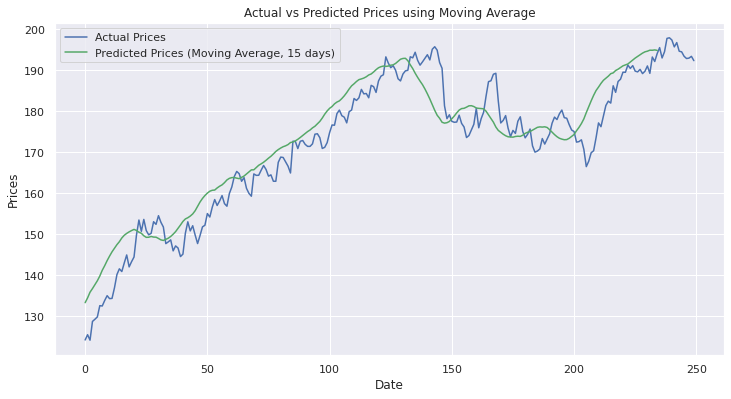

0      133.305827
1      134.471153
2      135.855640
3      136.741553
4      137.677787
          ...    
245           NaN
246           NaN
247           NaN
248           NaN
249           NaN
Name: Close, Length: 250, dtype: float64
0      0.000000
1      0.008742
2      0.010296
3      0.006521
4      0.006847
         ...   
245    0.000000
246    0.000000
247    0.000000
248    0.000000
249    0.000000
Name: Close, Length: 250, dtype: float64 0      0
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: Close, Length: 250, dtype: category
Categories (3, int64): [-1 < 0 < 1]
Portfolio Value (V(N)): 2
Optimal Buy Indices: [69, 232]


In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(prices_df['Close'])

# Function to predict prices using a simple moving average
def predict_prices(data, window_size):
    return data['Close'].rolling(window=window_size).mean().shift(-window_size)

# Choose the window size for the moving average
window_size = 15  # Adjust based on your analysis

# Predict prices using the moving average
predicted_prices = predict_prices(prices_df, window_size)

# Visualize the original and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(prices_df['Close'], label='Actual Prices')
plt.plot(predicted_prices, label=f'Predicted Prices (Moving Average, {window_size} days)')
plt.title('Actual vs Predicted Prices using Moving Average')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

print(predicted_prices)

def calculate_returns_and_states(close_prices):
    returns = close_prices.pct_change().fillna(0)
    states = pd.cut(returns, bins=[-float('inf'), -0.0001, 0.0001, float('inf')], labels=[-1, 0, 1])
    print(returns, states)
    return returns, states

def calculate_transition_distribution(states):
    transition_matrix = pd.crosstab(states.shift(), states, normalize='index')
    return transition_matrix

def make_decisions_and_update_portfolio(returns, states):
    portfolio_value = 0
    buy_indices = []

    for i in range(2, len(states)):
        if states[i] == 1 and states[i - 1] == 0:
            portfolio_value += 1
            buy_indices.append(i-1)
        #elif states[i] == -1 and states[i - 1] == 0:
            #portfolio_value -= 1
            #buy_indices.append(i-1)

    return portfolio_value, buy_indices

returns, states = calculate_returns_and_states(predicted_prices)
portfolio_value, buy_indices = make_decisions_and_update_portfolio(returns, states)

# Display the results
print(f"Portfolio Value (V(N)): {portfolio_value}")
print("Optimal Buy Indices:", buy_indices)

##### Checking predictions using 2022 Data

0      179.4980
1      177.2199
2      172.5058
3      169.6261
4      169.7938
         ...   
246    130.9600
247    129.1424
248    125.1797
249    128.7253
250    129.0431
Name: Close, Length: 251, dtype: float64


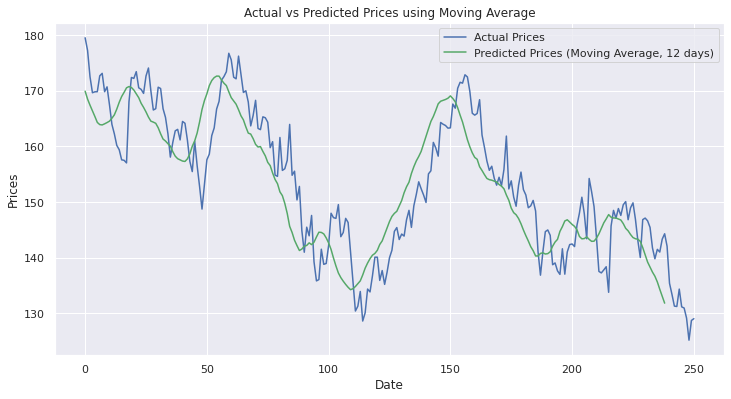

0      169.904733
1      168.483783
2      167.390750
3      166.386475
4      165.360825
          ...    
246           NaN
247           NaN
248           NaN
249           NaN
250           NaN
Name: Close, Length: 251, dtype: float64
0      0.000000
1     -0.008363
2     -0.006487
3     -0.006000
4     -0.006164
         ...   
246    0.000000
247    0.000000
248    0.000000
249    0.000000
250    0.000000
Name: Close, Length: 251, dtype: float64 0      0
1     -1
2     -1
3     -1
4     -1
      ..
246    0
247    0
248    0
249    0
250    0
Name: Close, Length: 251, dtype: category
Categories (3, int64): [-1 < 0 < 1]
Portfolio Value (V(N)): 1
Optimal Buy Indices: [186]


In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prices22 = price_data22['FIBBG000B9XRY4']['Close'].to_list()
prices_df22 = pd.DataFrame({'Close': prices22})
print(prices_df22['Close'])

# Function to predict prices using a simple moving average
def predict_prices(data, window_size):
    return data['Close'].rolling(window=window_size).mean().shift(-window_size)

# Choose the window size for the moving average
window_size = 12 # Adjust based on your analysis

# Predict prices using the moving average
predicted_prices = predict_prices(prices_df22, window_size)

# Visualize the original and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(prices_df22['Close'], label='Actual Prices')
plt.plot(predicted_prices, label=f'Predicted Prices (Moving Average, {window_size} days)')
plt.title('Actual vs Predicted Prices using Moving Average')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

print(predicted_prices)

def calculate_returns_and_states(close_prices):
    returns = close_prices.pct_change().fillna(0)
    states = pd.cut(returns, bins=[-float('inf'), -0.0001, 0.0001, float('inf')], labels=[-1, 0, 1])
    print(returns, states)
    return returns, states

def make_decisions_and_update_portfolio(returns, states):
    portfolio_value = 0
    buy_indices = []

    for i in range(2, len(states)):
        if states[i] == 1 and states[i - 1] == 0:
            portfolio_value += 1
            buy_indices.append(i-1)
        #elif states[i] == -1 and states[i - 1] == 0:
            #portfolio_value -= 1
            #buy_indices.append(i-1)

    return portfolio_value, buy_indices

returns, states = calculate_returns_and_states(predicted_prices)
portfolio_value, buy_indices = make_decisions_and_update_portfolio(returns, states)

# Display the results
print(f"Portfolio Value (V(N)): {portfolio_value}")
print("Optimal Buy Indices:", buy_indices)

#### Momentum

In [326]:
# Using momentum and multiplying it by TPM to predict the states

# Solution

## Considering return as percentage : (when range is [-0.01, 0.01])

#### Considering Losses :
* Portfolio - 2
* Optimal BuyIndices - [ 78, 92 ]

#### Not Considering Losses :
* Portfolio - 2
* Optimal BuyIndices - [ 78, 92 ]

<hr>

## Considering return as fraction :  (when range is [-0.01, 0.01])

#### Considering Losses :
* Portfolio - 17
* Optimal BuyIndices - [5, 7, 11, 15, 20, 27, 29, 32, 35, 38, 40, 44, 49, 51, 56, 58, 60, 63, 65, 68, 78, 84, 87, 93, 96, 99, 102, 107, 109, 112, 116, 119, 122, 127, 132, 135, 141, 144, 146, 153, 155, 159, 163, 168, 172, 176, 178, 182, 186, 190, 195, 200, 203, 206, 208, 211, 215, 217, 231, 233, 235, 237, 242]

#### Not Considering Losses :
* Portfolio - 40
* Optimal BuyIndices - [5, 7, 11, 15, 20, 27, 29, 40, 49, 51, 58, 60, 68, 78, 84, 87, 93, 99, 102, 107, 109, 112, 116, 119, 122, 132, 141, 159, 163, 176, 186, 190, 206, 208, 211, 215, 217, 231, 233, 237]

<hr>

## Considering return as percentage :  (when range is [-0.1, 0.1])

#### Considering Losses :
* Portfolio - 0
* Optimal BuyIndices - []

#### Not Considering Losses :
* Portfolio - 0
* Optimal BuyIndices - []

<hr>

## Considering return as fraction :  (when range is [-0.1, 0.1])

#### Considering with Losses :
* Portfolio - 5
* Optimal BuyIndices - [7, 11, 71, 78, 81, 86, 92, 95, 102, 115, 132, 152, 197, 202, 221, 226, 239, 244, 247]

#### Considering without Losses :
* Portfolio - 12
* Optimal BuyIndices - [7, 11, 71, 78, 92, 102, 132, 152, 202, 221, 226, 247]

<hr>